# 

In [ ]:
'''
hex_games_20000_size_7_BeforeEnd-0_OpenPos-14_Random-True.csv
hex_games_20000_size_7_BeforeEnd-3_OpenPos-17_Random-True.csv
hex_games_20000_size_7_BeforeEnd-5_OpenPos-19_Random-True.csv
hex_games_20000_size_9_BeforeEnd-0_OpenPos-26_Random-True.csv
hex_games_20000_size_9_BeforeEnd-3_OpenPos-29_Random-True.csv
hex_games_20000_size_9_BeforeEnd-5_OpenPos-31_Random-True.csv
hex_games_20000_size_11_BeforeEnd-0_OpenPos-40_Random-True.csv
hex_games_20000_size_11_BeforeEnd-3_OpenPos-46_Random-True.csv
hex_games_20000_size_11_BeforeEnd-5_OpenPos-50_Random-True.csv
'''

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.lines import Line2D
import numpy as np
import math


print("Complete.")

Complete.


In [29]:
# Adjust these as needed
CSV_FILE = "hex_games_20000_size_7_BeforeEnd-0_OpenPos-14_Random-True.csv"
BOARD_DIM = 7
GAMES_TO_SHOW = 5  # Number of boards to visualize
print("Complete.")

Complete.


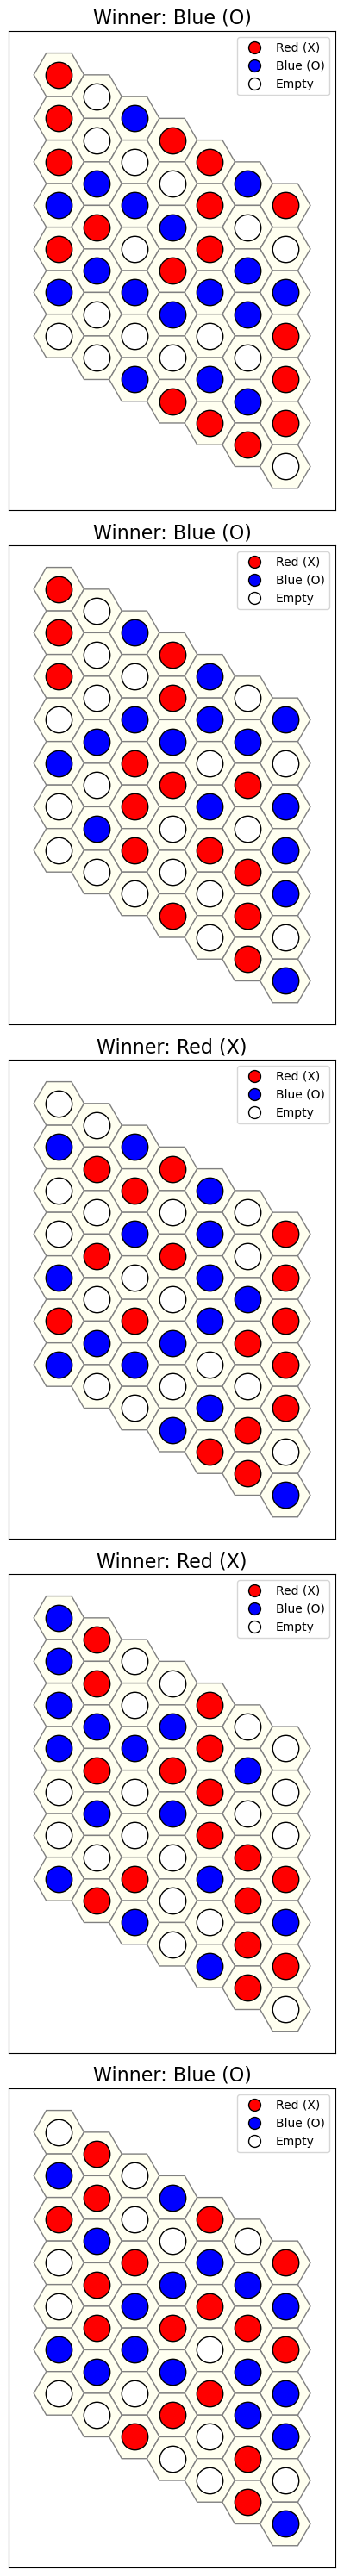

In [30]:
HEX_RADIUS = 0.4
HEX_WIDTH = 2 * HEX_RADIUS
HEX_HEIGHT = np.sqrt(3) * HEX_RADIUS

VALUE_TO_SYMBOL = {1: 'X', -1: 'O', 0: '.'}
VALUE_TO_COLOR = {1: 'red', -1: 'blue', 0: 'white'}

def load_data(csv_file, games_to_show):
    data = pd.read_csv(csv_file)
    return data.head(games_to_show)

def determine_alpha_map(winner_val):
    return {1: 1.0, -1: 1.0, 0: 1.0}

def hex_coords(i, j):
    # Diamond-like layout
    x = j * (HEX_WIDTH * 0.75)
    y = i * HEX_HEIGHT + (j * (HEX_HEIGHT / 2.0))
    return x, y

def extract_board(row, board_dim):
    board = []
    for i in range(board_dim):
        cells = [int(row[f'cell{i}_{j}']) for j in range(board_dim)]
        board.append(cells)
    return board

def draw_hex_cells(ax):
    for i in range(BOARD_DIM):
        for j in range(BOARD_DIM):
            x, y = hex_coords(i, j)
            hex_cell = RegularPolygon(
                (x, y), numVertices=6, radius=HEX_RADIUS, 
                orientation=np.radians(30), edgecolor='gray', 
                facecolor='ivory', linewidth=1
            )
            ax.add_patch(hex_cell)

def draw_pieces(ax, board, alpha_map):
    marker_size = HEX_RADIUS * 1200
    for i in range(BOARD_DIM):
        for j in range(BOARD_DIM):
            val = board[i][j]
            x, y = hex_coords(i, j)
            color = VALUE_TO_COLOR[val]
            alpha = alpha_map[val]
            symbol = VALUE_TO_SYMBOL[val]

            if symbol != '.':
                ax.scatter(x, y, s=marker_size, c=color, edgecolors='black', alpha=alpha, linewidths=1, zorder=10)
            else:
                ax.scatter(x, y, s=marker_size, c='white', edgecolors='black', linewidths=1, zorder=9)

def adjust_axes(ax):
    max_x, max_y = hex_coords(BOARD_DIM - 1, BOARD_DIM - 1)
    ax.set_xlim(-HEX_WIDTH, max_x + HEX_WIDTH)
    ax.set_ylim(-HEX_HEIGHT, max_y + HEX_HEIGHT)
    ax.invert_yaxis()
    ax.set_aspect('equal', 'box')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(True)
    ax.set_facecolor("white")

def add_legend(ax):
    legend_elements = [
        Line2D([0], [0], marker='o', markersize=10,
               markerfacecolor='red', markeredgecolor='black',
               linestyle='None', label='Red (X)'),
        Line2D([0], [0], marker='o', markersize=10,
               markerfacecolor='blue', markeredgecolor='black',
               linestyle='None', label='Blue (O)'),
        Line2D([0], [0], marker='o', markersize=10,
               markerfacecolor='white', markeredgecolor='black',
               linestyle='None', label='Empty')
    ]

    # Create the legend without zorder
    legend = ax.legend(handles=legend_elements, loc='upper right', frameon=True)

    # Set the zorder after creation
    legend.set_zorder(20)
def add_player_labels(ax):
    # Place Red (X) top-left corner of the axes
    ax.text(0.01, 0.05, "Red (X)", color='red', fontsize=10, fontweight='bold',
            transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='left', zorder=30)
    # Place Blue (O) bottom-left corner of the axes
    ax.text(0.01, 0.95, "Blue (O)", color='blue', fontsize=10, fontweight='bold',
            transform=ax.transAxes, verticalalignment='top', horizontalalignment='left', zorder=30)

def main():
    subset = load_data(CSV_FILE, GAMES_TO_SHOW)
    fig, axes = plt.subplots(nrows=GAMES_TO_SHOW, ncols=1, figsize=(12, 6 * GAMES_TO_SHOW))

    if GAMES_TO_SHOW == 1:
        axes = [axes]

    for ax, (_, row) in zip(axes, subset.iterrows()):
        board = extract_board(row, BOARD_DIM)
        winner_val = int(row['winner'])
        winner_str = "Red (X)" if winner_val == 1 else "Blue (O)"
        alpha_map = determine_alpha_map(winner_val)

        ax.clear()
        ax.set_title(f"Winner: {winner_str}", fontsize=16)

        draw_hex_cells(ax)
        draw_pieces(ax, board, alpha_map)
        adjust_axes(ax)
        add_legend(ax)
        #add_player_labels(ax)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
